In [ ]:
!pip install keras

## Steps
1. Data cleaning
2. Preprocessing (Tokenize and padding)
3. Building the model with embedding layer
4. Evaluate

In [ ]:
import csv
import tensorflow as tf
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from keras.layers import Activation, Dense, Embedding, GlobalMaxPooling1D
from keras.models import Sequential

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = 0.8
vocab_size = 1000
embedding_dim = 16
max_length = 120

In [ ]:
stop_words = set(stopwords.words('english'))
print(len(stop_words))

179


In [ ]:
sentences = []
labels = []
with open('/content/drive/MyDrive/Learn/Mahara-tech/bbc-text.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentence = row[1]
    for word in stop_words:
      token = " " + word + " "
      sentence = sentence.replace(token, " ")
    sentences.append(sentence)

print(len(sentences))
print(len(labels))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite 

In [ ]:
train_size = int(len(sentences)*training_portion)
train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


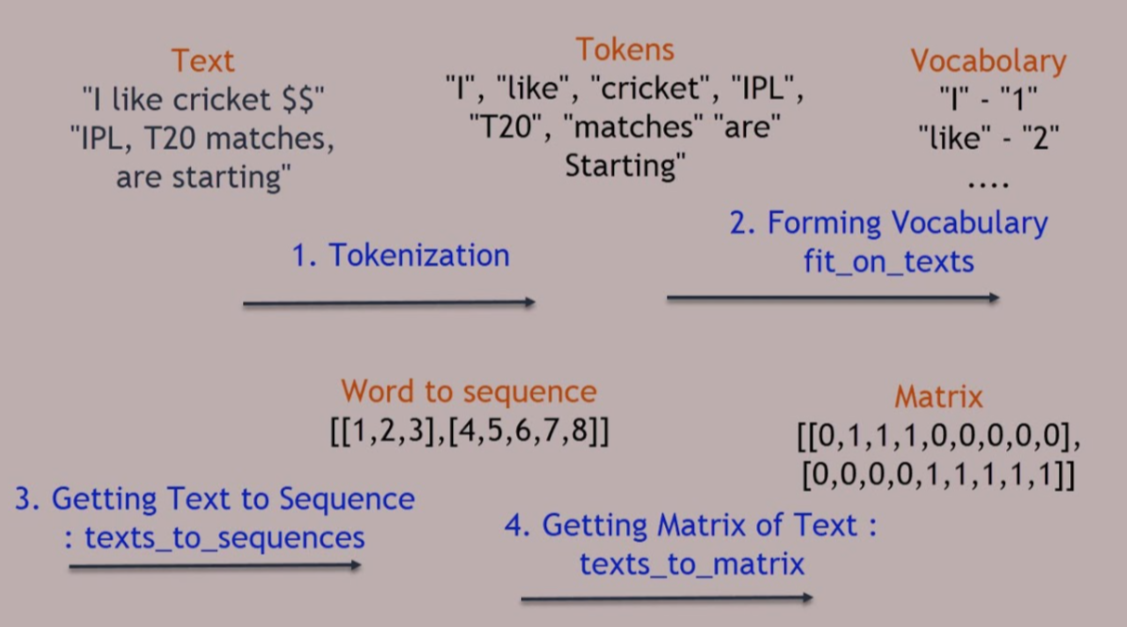

In [ ]:
# step 1: tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
# step 2: forming vocabulary fit on text
tokenizer.fit_on_texts(train_sentences)
# get the dictionary and print it
word_index = tokenizer.word_index
print(word_index)

# step 3: Transform each text in texts into a sequence of integer numbers
train_sequences = tokenizer.texts_to_sequences(train_sentences)
# step 4: getting matrix to text by padding
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(train_sequences[20])
print(train_padded[20])

print(len(train_sequences[0]))
print(len(train_padded[0]))
print(len(train_sequences[1]))
print(len(train_padded[1]))
print(len(train_sequences[10]))
print(len(train_padded[10]))

{'<OOV>': 1, 'said': 2, 'mr': 3, 'would': 4, 'year': 5, 'also': 6, 'people': 7, 'new': 8, 'us': 9, 'one': 10, 'could': 11, 'last': 12, 'first': 13, 'time': 14, 'two': 15, 'government': 16, 'world': 17, 'uk': 18, 'best': 19, 'years': 20, 'make': 21, 'film': 22, 'told': 23, 'made': 24, 'get': 25, 'music': 26, 'game': 27, 'like': 28, 'back': 29, 'many': 30, '000': 31, 'labour': 32, 'three': 33, 'well': 34, '1': 35, 'next': 36, 'bbc': 37, 'take': 38, 'set': 39, 'number': 40, 'added': 41, 'way': 42, 'market': 43, '2': 44, 'company': 45, 'may': 46, 'says': 47, 'election': 48, 'home': 49, 'party': 50, 'good': 51, 'going': 52, 'much': 53, 'work': 54, '2004': 55, 'still': 56, 'win': 57, 'show': 58, 'think': 59, 'games': 60, 'go': 61, 'top': 62, 'second': 63, 'million': 64, '6': 65, 'england': 66, 'firm': 67, 'since': 68, 'week': 69, 'say': 70, 'play': 71, 'part': 72, 'public': 73, 'use': 74, 'blair': 75, '3': 76, 'want': 77, 'minister': 78, 'however': 79, '10': 80, 'country': 81, 'technology': 

In [ ]:
validation_sentences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sentences, padding=padding_type, maxlen=max_length)
print(len(validation_sentences))
print(validation_padded.shape)

445
(445, 120)


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

word_index = label_tokenizer.word_index
print(word_index)

train_labels_sequences = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_labels_sequences = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(train_labels_sequences[0])
print(train_labels_sequences[1])
print(train_labels_sequences[2])
print(train_labels_sequences.shape)

print(validation_labels_sequences[0])
print(validation_labels_sequences[1])
print(validation_labels_sequences[2])
print(validation_labels_sequences.shape)

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}
[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 120, 16)           16000     
                                                                 
 global_max_pooling1d_6 (Gl  (None, 16)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_12 (Dense)            (None, 24)                408       
                                                                 
 dense_13 (Dense)            (None, 6)                 150       
                                                                 
Total params: 16558 (64.68 KB)
Trainable params: 16558 (64.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_padded, train_labels_sequences,
          validation_data=(validation_padded, validation_labels_sequences),
          epochs=30, verbose=1)

Epoch 1/30
56/56 [==============================] - 1s 9ms/step - loss: 1.7571 - accuracy: 0.2640 - val_loss: 1.7190 - val_accuracy: 0.2382
Epoch 2/30
56/56 [==============================] - 0s 6ms/step - loss: 1.6829 - accuracy: 0.2494 - val_loss: 1.6352 - val_accuracy: 0.2674
Epoch 3/30
56/56 [==============================] - 0s 5ms/step - loss: 1.5810 - accuracy: 0.3961 - val_loss: 1.5219 - val_accuracy: 0.4562
Epoch 4/30
56/56 [==============================] - 0s 5ms/step - loss: 1.4331 - accuracy: 0.5438 - val_loss: 1.3541 - val_accuracy: 0.5910
Epoch 5/30
56/56 [==============================] - 0s 6ms/step - loss: 1.2174 - accuracy: 0.6522 - val_loss: 1.1271 - val_accuracy: 0.6989
Epoch 6/30
56/56 [==============================] - 0s 5ms/step - loss: 0.9650 - accuracy: 0.7455 - val_loss: 0.8891 - val_accuracy: 0.7753
Epoch 7/30
56/56 [==============================] - 0s 5ms/step - loss: 0.7364 - accuracy: 0.8270 - val_loss: 0.7068 - val_accuracy: 0.8247
Epoch 8/30
56/56 [==

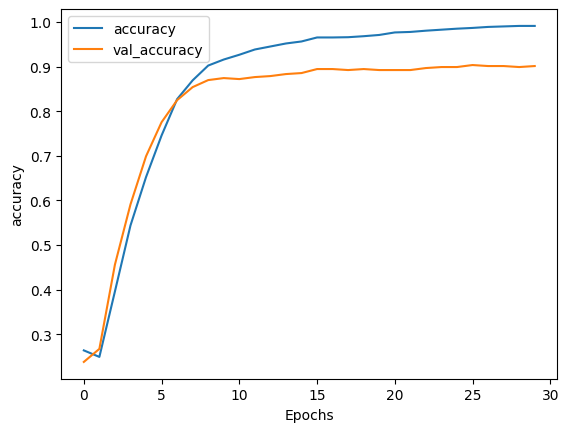

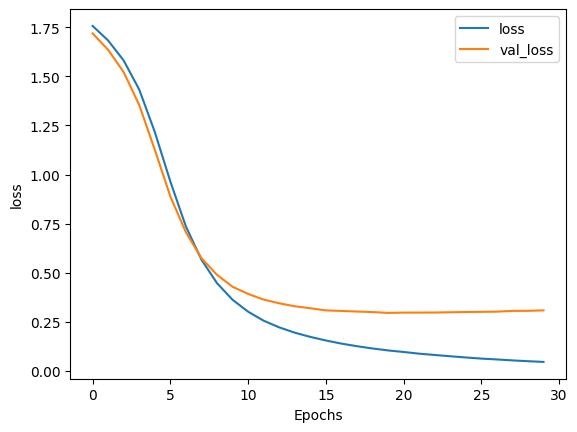

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")